In [1]:
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/frequencyswitch/data/TREG_050627/TREG_050627.raw.acs/TREG_050627.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

Starting download...
TREG_050627.raw.acs.fits already downloaded at /users/esmith/Git/dysh/notebooks/examples/data


In [3]:
sdfits = GBTFITSLoad(filename)
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,90,W3OH,0.0,Track,1,1.667359,1.667359,1,2,6,1,22.22828,18.114536
1,91,W3OH,0.0,Track,1,1.667359,1.667359,1,2,6,1,22.352097,18.20982
2,92,W3OH,0.0,Track,1,1.667359,1.667359,1,2,6,1,22.473876,18.304346
3,93,W3OH,0.0,Track,1,1.667359,1.667359,1,2,6,1,22.595308,18.399341
4,94,W3OH,0.0,Track,1,1.667359,1.667359,1,2,6,1,22.716326,18.494854


In [4]:
fs_scan_block = sdfits.getfs(scan=90, ifnum=0, plnum=1)

 ID    TAG    SCAN IFNUM PLNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----- ----------
  0 e5eec72f8   90     0     1   [0]         24


In [5]:
ta = fs_scan_block.timeaverage(weights='tsys')

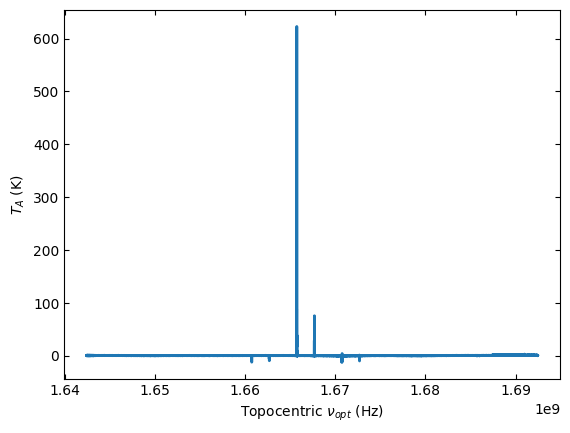

In [6]:
ta.plot()

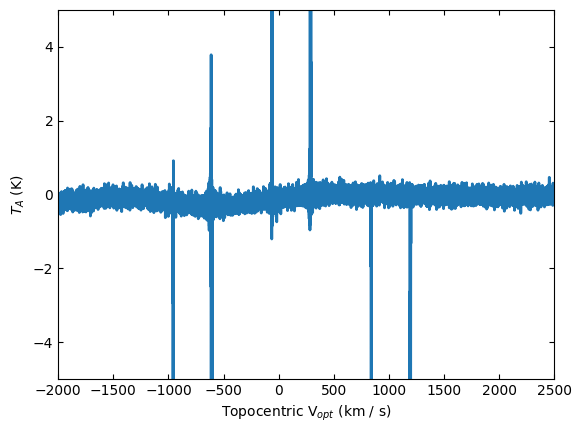

In [7]:
ta.plot(xaxis_unit="km/s", yaxis_unit="K", ymin=-5, ymax=5, xmin=-2000, xmax=2500)

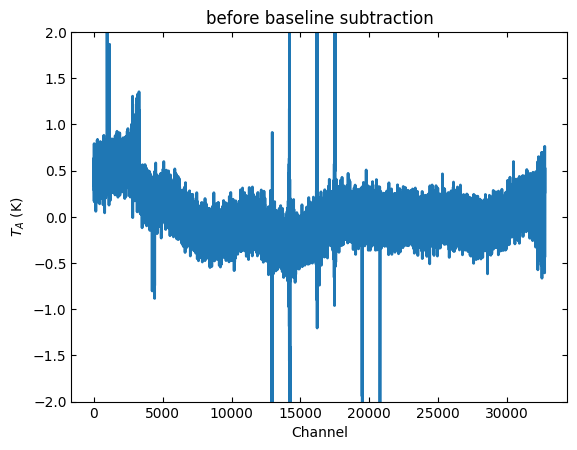

In [8]:
ta.plot(xaxis_unit="chan", yaxis_unit="K", ymin=-2, ymax=2, title="before baseline subtraction")

Before baseline subtraction -- mean: 0.1734 K median: 0.1736 K rms: 0.140 K min: -0.88 K max: 0.60 K
EXCLUDING [Spectral Region, 1 sub-regions:
  (1686044223.7148438 Hz, 1692452915.1210938 Hz) 
, Spectral Region, 1 sub-regions:
  (1658883579.1835938 Hz, 1677194126.0585938 Hz) 
, Spectral Region, 1 sub-regions:
  (1642454441.0 Hz, 1643624790.1210938 Hz) 
]


After baseline subtraction -- mean: -0.0078 K median: -0.0070 K rms: 0.145 K min: -1.10 K max: 0.45 K


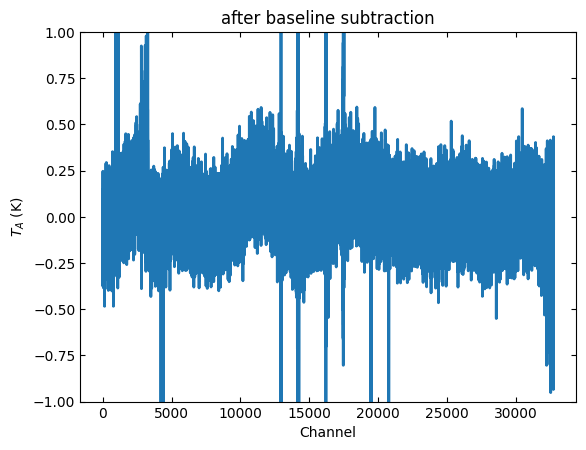

In [9]:
# Define a string.
fmt_str = "mean: {mean:.4f} median: {median:.4f} rms: {rms:.3f} min: {min:.2f} max: {max:.2f}"
# Print the statistics before baseline subtraction.
print(f"Before baseline subtraction -- {fmt_str}".format(**ta[4200:5300].stats()))

# Subtract the baseline.
ta.baseline(model="chebyshev", degree=5, include=[(4200,10000),(22000,32000)], remove=True)

# Print the statistics after baseline subtraction.
print(f"After baseline subtraction -- {fmt_str}".format(**ta[4200:5300].stats()))

# Now plot the baseline subtracted spectrum.
ta.plot(xaxis_unit="chan", yaxis_unit="K", ymin=-1, ymax=1, title="after baseline subtraction")

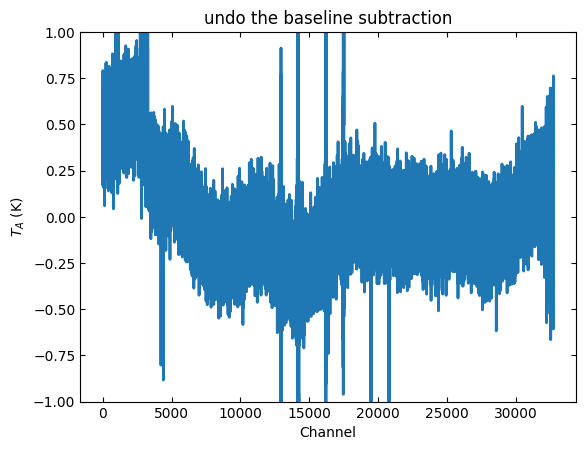

After undoing the baseline subtraction -- mean: 0.1734 K median: 0.1736 K rms: 0.140 K min: -0.88 K max: 0.60 K


In [10]:
ta.undo_baseline()
ta.plot(xaxis_unit="chan", yaxis_unit="K", ymin=-1, ymax=1, title='undo the baseline subtraction')
print(f"After undoing the baseline subtraction -- {fmt_str}".format(**ta[4200:5300].stats()))

In [11]:
output_dir = Path.cwd() / "output"
ta.savefig(output_dir / "baselined_removed.png")

In [12]:
sdfits.select(scan=90, ifnum=0)

 ID    TAG    SCAN IFNUM PLNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----- ----------
  0 c19f9d13f   90     0                     48
  1 38ec1f9a2 [90]   [0]     1   [0]         24


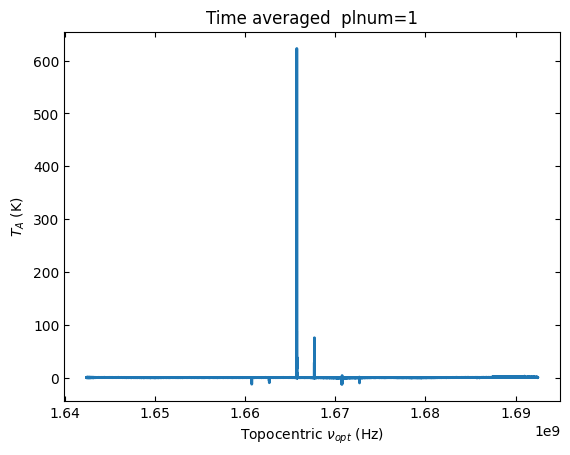

Using selection polarization 1 -- mean: 0.1734 K median: 0.1736 K rms: 0.140 K min: -0.88 K max: 0.60 K


In [13]:
fs_scan_block2 = sdfits.getfs(plnum=1)
ta2 = fs_scan_block2.timeaverage()
ta2.plot(title='Time averaged  plnum=1')
print(f"Using selection polarization 1 -- {fmt_str}".format(**ta2[4200:5300].stats()))

 ID    TAG    SCAN IFNUM PLNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----- ----------
  0 c19f9d13f   90     0                     48
  1 38ec1f9a2 [90]   [0]     0   [0]         24


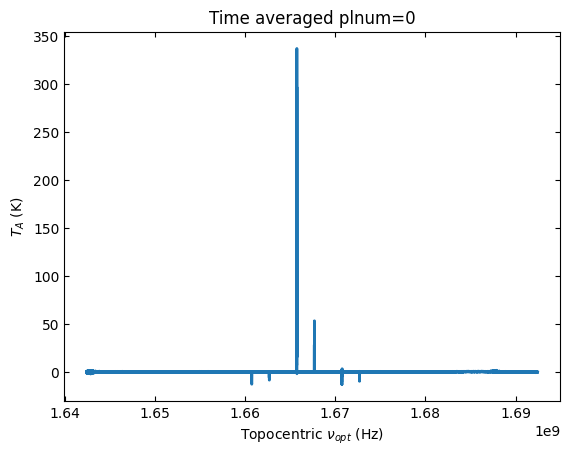

Using selection polarization 0 -- mean: 0.3231 K median: 0.3269 K rms: 0.135 K min: -0.42 K max: 0.81 K


In [14]:
fs_scan_block3 = sdfits.getfs(plnum=0)
ta3 = fs_scan_block3.timeaverage()
ta3.plot(title='Time averaged plnum=0')
print(f"Using selection polarization 0 -- {fmt_str}".format(**ta3[4200:5300].stats()))

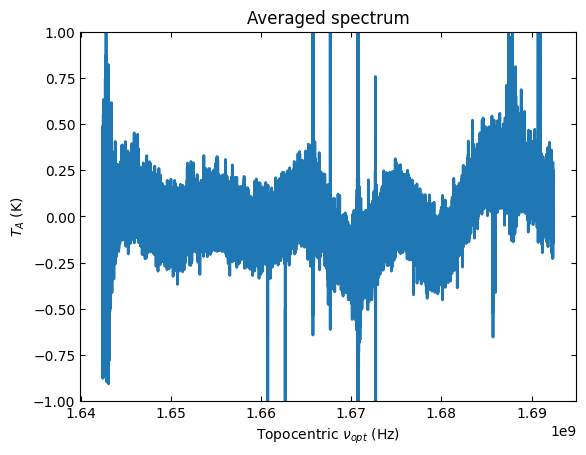

Polarization average -- mean: 0.2483 K median: 0.2515 K rms: 0.105 K min: -0.65 K max: 0.54 K


In [15]:
avg = 0.5*(ta2 + ta3)
avg.plot(ymin=-1,ymax=1, title='Averaged spectrum')
print(f"Polarization average -- {fmt_str}".format(**avg[4200:5300].stats()))